In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
# Import data from csv file, create headers for each column based on the LabView VI.
df = pd.read_csv('p_only_square.csv', index_col=False, skiprows=26, delimiter='\t',
                names=['time_s', 'goal_deg', 'true_deg', 'vel_deg', 'amp', 'freq_hz',
                         'sin0_or_sqr1', 'cmd_sig', 'controller'])
df.insert(3, 'error', df['goal_deg'] - df['true_deg'], True)
df.head()

,time_s,goal_deg,true_deg,error,vel_deg,amp,freq_hz,sin0_or_sqr1,cmd_sig,controller
0,0.015161,113.0,0.0,113.0,0.0,113.0,0.25,1.0,84.75,1.0
1,0.015662,113.0,0.0,113.0,0.0,113.0,0.25,1.0,84.75,1.0
2,0.016162,113.0,0.0,113.0,0.0,113.0,0.25,1.0,84.75,1.0
3,0.016662,113.0,0.0,113.0,0.0,113.0,0.25,1.0,84.75,1.0
4,0.017264,113.0,0.0,113.0,0.0,113.0,0.25,1.0,84.75,1.0


<Axes: xlabel='time_s'>

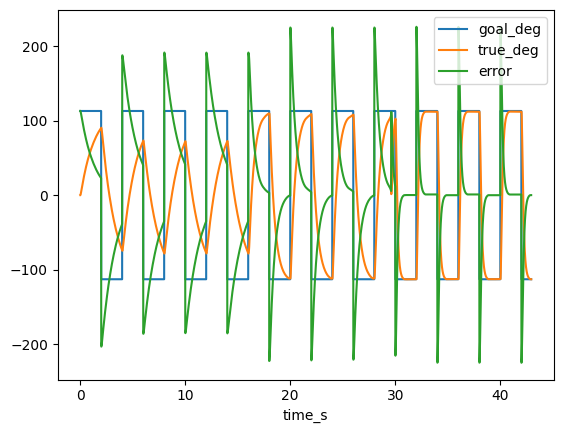

In [139]:
df.plot(x="time_s", y=['goal_deg', 'true_deg','error'])

<Axes: xlabel='time_s'>

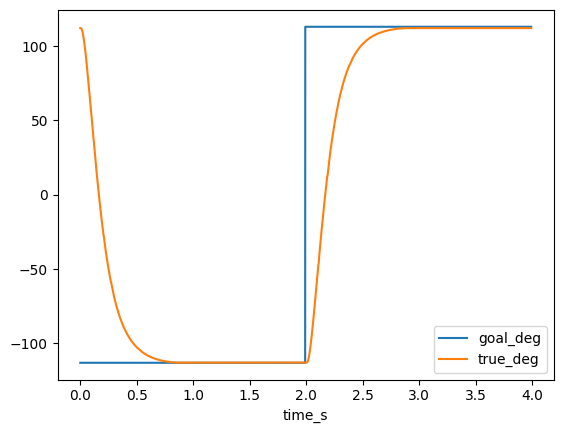

In [140]:
# Isolate one cycle
df = df[df['time_s'] > 34.01]
df = df[df['time_s'] < 38]

df['time_s'] = df['time_s'] - df['time_s'].min()

df.plot(x="time_s", y=['goal_deg', 'true_deg'])

In [141]:
# Mean, sdt, rms error
mean_error = np.mean(abs(df['error']))
std_error = np.std(df['error'])
rms_error = np.sqrt(np.mean(np.square(df['error'])))
print(f'mean: {mean_error} \n\nstd: {std_error} \n\nrms: {rms_error}')

mean: 23.63386631144845 

std: 57.58907396042426 

rms: 57.59809904825871


In [142]:
# Command statistics
command_mean = np.mean(abs(df['cmd_sig']))
command_std = np.std(df['cmd_sig'])
rms_command = np.sqrt(np.mean(np.square(df['cmd_sig'])))
print(f'mean: {command_mean} \n\nstd: {command_std} \n\nrms: {rms_command}')

mean: 114.82852624920936 

std: 281.3112949102035 

rms: 281.3601107528103


In [143]:
# Find percent overshoot
max = df['true_deg'].max()
overshoot = max - df['goal_deg'].max()
pc_overshoot = ((max/df['goal_deg'].max())-1)*100
print(overshoot, pc_overshoot)

-0.8952390000000037 -0.7922469026548695


In [144]:
# Rise and settling time
rise = 0.86749 # seconds
# Settle not applicable

### p = 0.75
error

mean: -4.290505148250691 

std: 84.62406158007472 

rms: 84.73275773120716


command:

mean: -1.6460263025421538 

std: 83.0455987864928 

rms: 83.06190992504203

OS & %OS
not applicable

rise = not applicable

Settle not applicable

### p = 2

error:

mean: -0.2722442499685593 

std: 160.00613103949416 

rms: 160.006362645863

command:

mean: 3.8399547112844368 

std: 163.09391201904396 

rms: 163.13911054636887

OS & % OS not applicable

rise = 1.1315 # seconds

Settle not applicable

### p = 5

error

mean: -0.09930060607210187 

std: 253.6415492053766 

rms: 253.64156864345765

command

mean: 5.240923466160658 

std: 281.3112949102035 

rms: 281.3601107528103

OS & % OS not applicable

rise = 0.4484 # seconds

settle = 0.6513 # seconds